In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
mean1 = 1
mean2 = 1
std1 = 0.1
std2 = 0.1
datapoints = 500
no_of_features = 2
cluster1 = np.random.normal([mean1,mean2],[std1,std2],size=(datapoints,no_of_features))

mean1 = 2
mean2 = 2
std1 = 0.1
std2 = 0.1
datapoints = 500
no_of_features = 2
cluster2 = np.random.normal([mean1,mean2],[std1,std2],size=(datapoints,no_of_features))


X = np.vstack([cluster1,cluster2])
Y = np.array([-1 for i in range(500)]+[1 for i in range(500)])

(1000,)


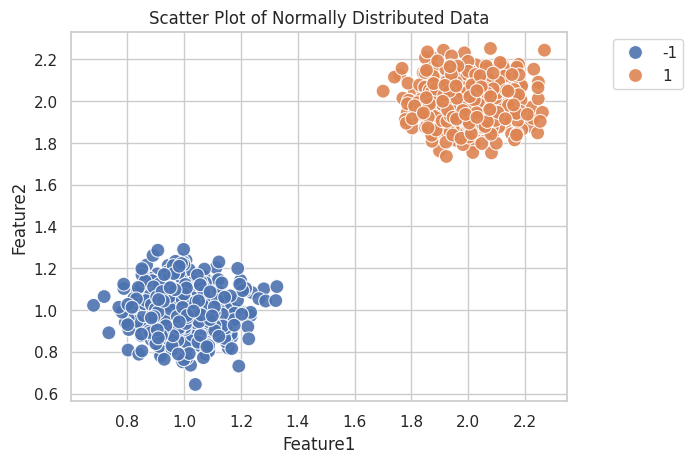

In [78]:

print(Y.shape)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Label'] = Y


# Set Seaborn style
sns.set(style='whitegrid', palette='pastel')

plt.figure()
# Create a scatter plot with color gradient
scatter_plot = sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='deep', s=100, alpha=0.9)

# Set plot title and labels
plt.title('Scatter Plot of Normally Distributed Data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))


# Show the plot
plt.show()

In [79]:

def find_dist(d1,d2):
  return ((d1[0]-d2[0])**2+(d1[1]-d2[1])**2)**0.5

def find_nearest_points(cluster1,cluster2):

  min_dist = float('inf')
  c1,c2 = None,None
  for d1 in cluster1:
    for d2 in cluster2:
      new_dist = find_dist(d1,d2)
      if new_dist <= min_dist:
        min_dist = new_dist
        c1 = d1
        c2 = d2
  return c1,c2

c1,c2 = find_nearest_points(cluster1,cluster2)
print(c1,c2,find_dist(c1,c2))

[1.32626798 1.11200007] [1.92283222 1.73517054] 0.862687857940004


In [80]:
def perceptron(X,Y,W,Epochs):

  list_of_k = []
  n = 1
  for itr in range(Epochs):
    k = 0
    for i in  range(X.shape[0]):
      Y_pred = X[i].dot(W)
      if Y_pred * Y[i] <= 0:
        W = W + (X[i]*Y[i])
        k += 1
    list_of_k.append(k)

    if list_of_k[-1] == 0:
      print("Number if epochs for which algo runs is ",len(list_of_k)-1)
      n = len(list_of_k)
      break

  return sum(list_of_k), W

In [81]:
def create_plot(ax,df,Y,W):

  b, w1, w2 = W
  # Plot the df
  sns.set(style='whitegrid', palette='pastel')
  scatter_plot = sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='deep', s=100, alpha=0.9,ax=ax)

  ax.set_title('Scatter Plot of Normally Distributed Data')
  ax.set_xlabel('Feature1')
  ax.set_ylabel('Feature2')
  ax.legend()

  # Plot the decision boundary
  x_min, x_max = df['Feature1'].min() + 1, df['Feature1'].max() - 1
  xx = np.linspace(x_min, x_max, 100)
  if w2==0:
    w2=0.00001
  yy = - (w1 / w2) * xx - (b / w2)

  ax.plot(xx, yy, color='red', linestyle='dashed', linewidth=2, label='Decision Boundary')
  ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

In [82]:
X = np.column_stack([np.ones(X.shape[0]), X])

(3,)
Number if epochs for which algo runs is  8
18 [-4.          2.44463233  0.44239335]


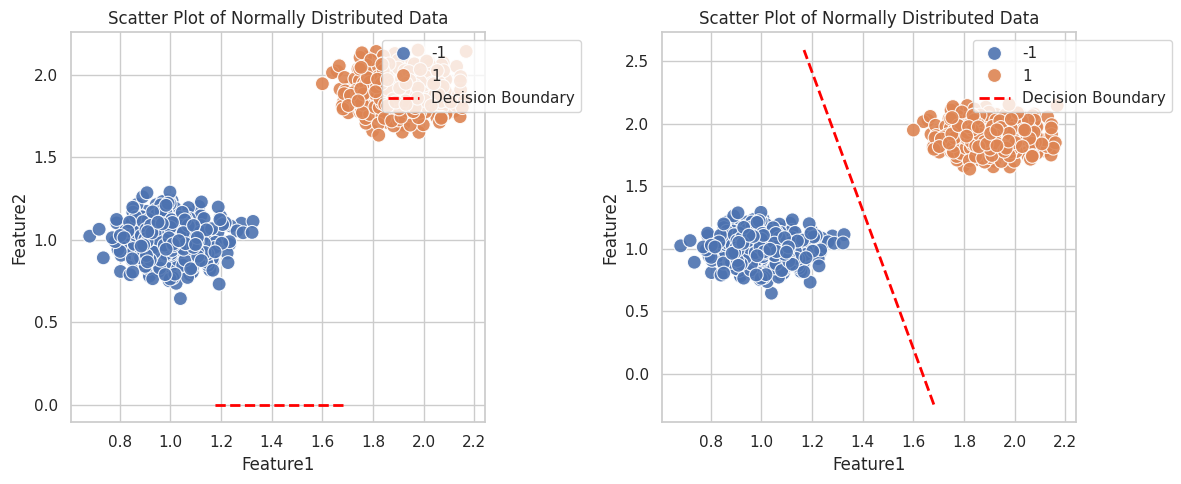

(3,)
Number if epochs for which algo runs is  5
10 [-2.          1.07181722  0.23948123]


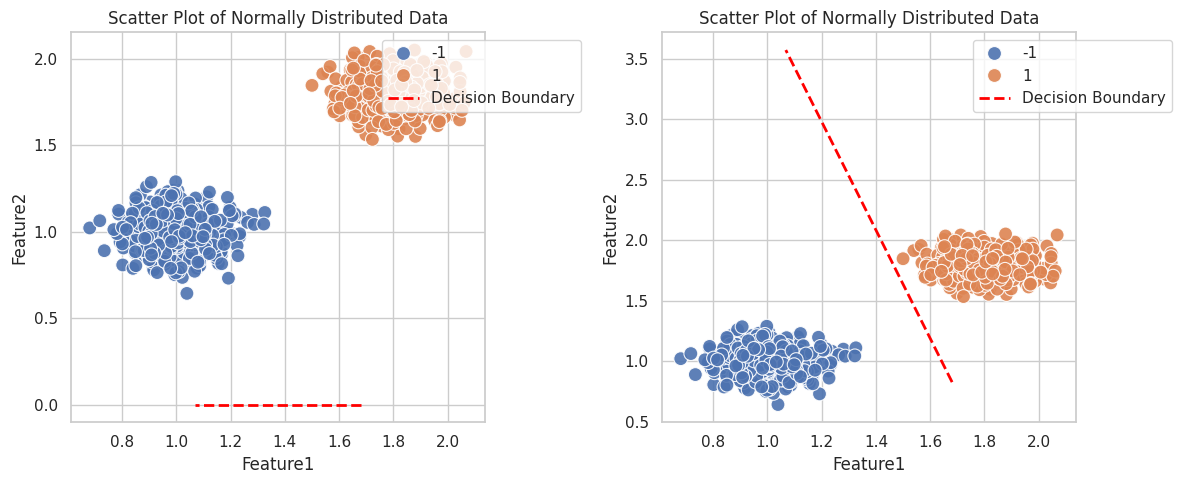

(3,)
Number if epochs for which algo runs is  13
29 [-5.          3.0591375   0.52121912]


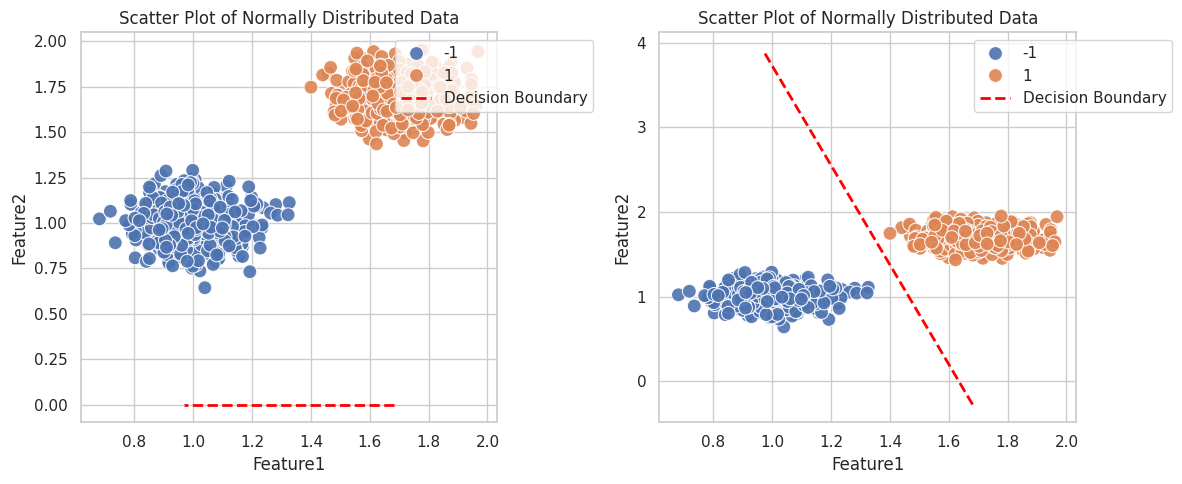

(3,)
Number if epochs for which algo runs is  19
42 [-6.          3.86218264  0.7539218 ]


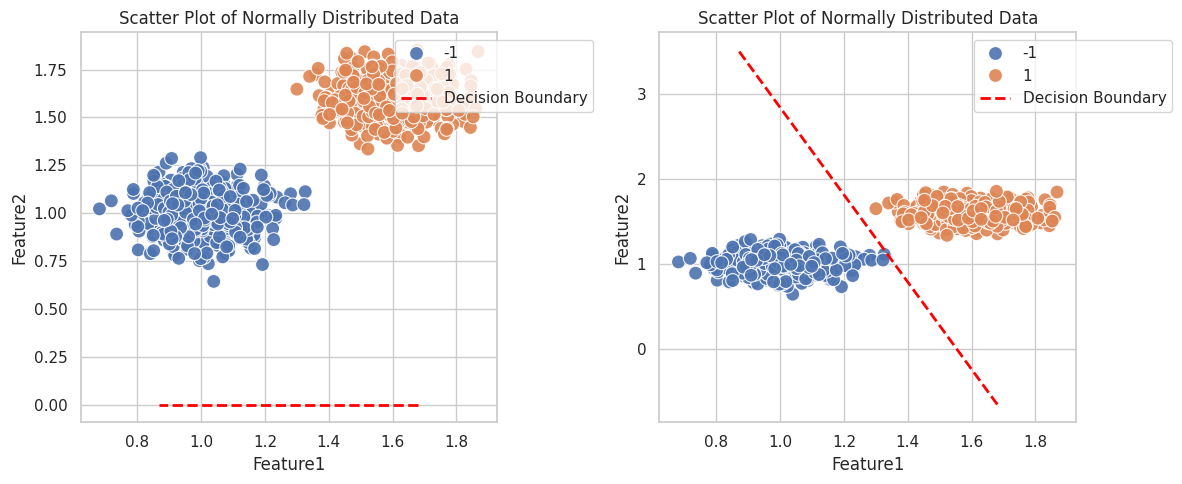

(3,)
Number if epochs for which algo runs is  42
92 [-10.           5.68755835   2.18602315]


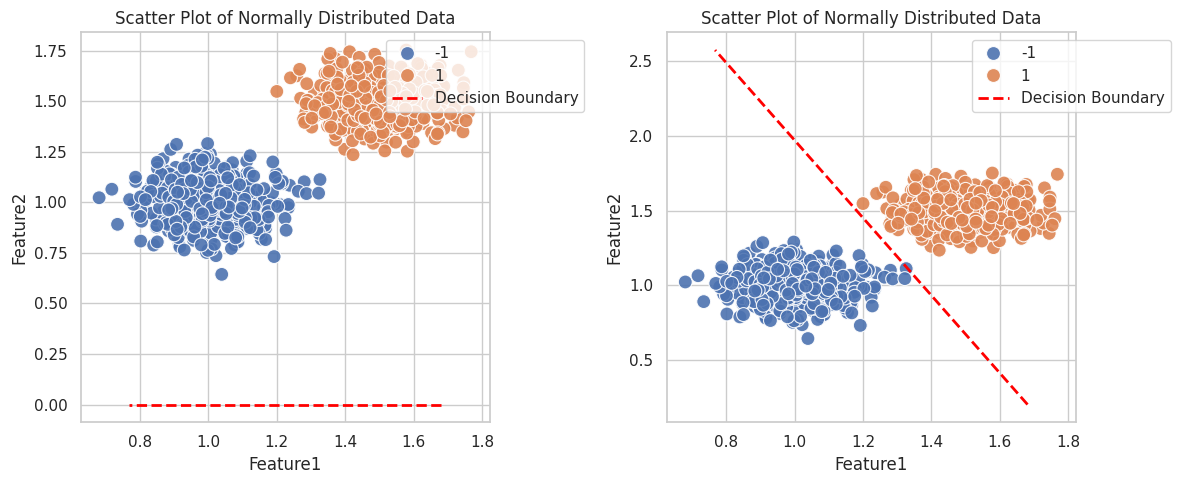

In [83]:
for i in range(5):
  W = np.zeros(X.shape[1])
  print(W.shape)

  for i in range(2):
    for j in range(500):
      X[j+500][i+1]-=0.1

  K,W = perceptron(X,Y,W,1000)
  print(K,W)
  df = pd.DataFrame(X, columns=['Bias','Feature1', 'Feature2'])
  df['Label'] = Y
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  sns.set(style='whitegrid', palette='pastel')
  create_plot(ax[0],df,Y,np.zeros(X.shape[1]))
  create_plot(ax[1],df,Y,W)
  plt.tight_layout()
  plt.show()